In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
compressive_df = pd.read_csv("Copy of ZEN Data sheet - Compressive_strength_cleaned.csv")

In [31]:
compressive_df.head()

,Batch No.,Sample No.,CO₂ Volume (L),Weight (kg),Max Load (kN),Max Strength (N/mm²),Curing Time (days),Mixing Date,End of Curing
0,1,Sn 001,0,8.00,88.062,3.914,1,6/10/2025,6/11/2025
1,2,Sn 009,20,7.90,41.709,1.854,1,6/10/2025,6/11/2025
2,2,Sn 008,20,7.90,77.772,3.457,1,6/10/2025,6/11/2025
3,2,Sn 012,20,7.75,260.881,11.595,14,6/10/2025,6/25/2025
4,3,Sn 003,0,8.15,393.201,17.476,7,6/11/2025,6/18/2025


In [32]:
compressive_df.dtypes

Batch No.                 int64
Sample No.               object
CO₂ Volume (L)            int64
Weight (kg)             float64
Max Load (kN)           float64
Max Strength (N/mm²)    float64
Curing Time (days)        int64
Mixing Date              object
End of Curing            object
dtype: object

In [33]:
compressive_df['Mixing Date'] = pd.to_datetime(compressive_df['Mixing Date'])
compressive_df['End of Curing'] = pd.to_datetime(compressive_df['End of Curing'])

#### Strength vs Curing Time by CO₂ Volume

In [35]:
# palette for curing time categories
curing_palette = {
    1: "#1f77b4",   # blue
    7: "#ff7f0e",   # orange
    14: "#2ca02c",  # green
    21: "#d62728",  # red
    28: "#9467bd"   # purple
}

# CO₂ levels
co2_palette = {
    0: "#636EFA",     # dark blue
    20: "#EF553B",    # red-orange
    40: "#00CC96",    # teal
    60: "#AB63FA",    # violet
    105: "#FFA15A",   # soft orange
}

co2_palette2 = {
    '0': "#636EFA",     # dark blue
    '20': "#EF553B",    # red-orange
    '40': "#00CC96",    # teal
    '60': "#AB63FA",    # violet
}

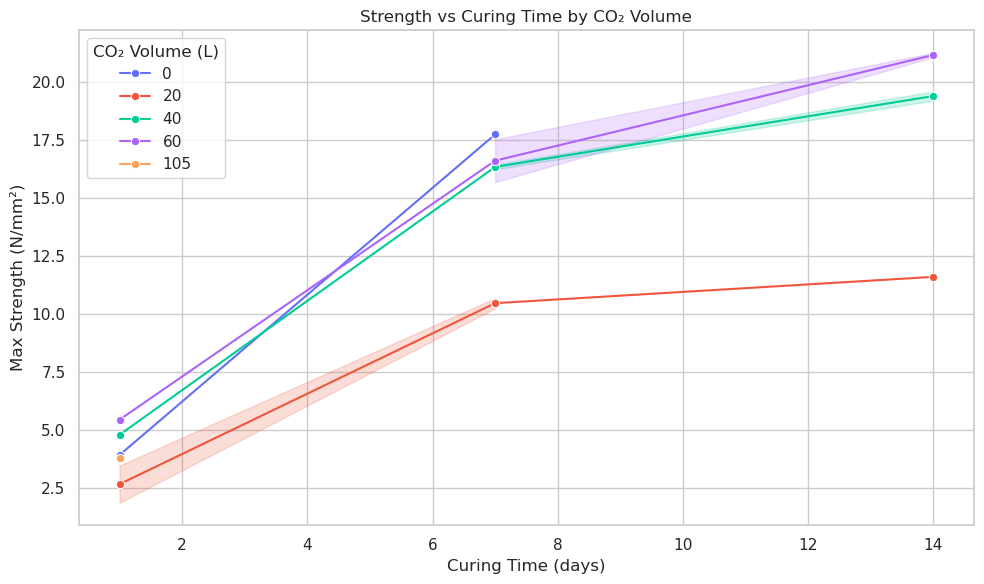

In [36]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=compressive_df,
    x="Curing Time (days)",
    y="Max Strength (N/mm²)",
    hue="CO₂ Volume (L)",
    marker="o",
    palette=co2_palette
)

plt.title("Strength vs Curing Time by CO₂ Volume")
plt.ylabel("Max Strength (N/mm²)")
plt.xlabel("Curing Time (days)")
plt.tight_layout()
plt.show()
plt.savefig("strength_vs_curing_time.png", dpi=300)
plt.close()

#### Max Strength at 7 Days by CO₂ Volume

/tmp/ipykernel_10751/2925508426.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


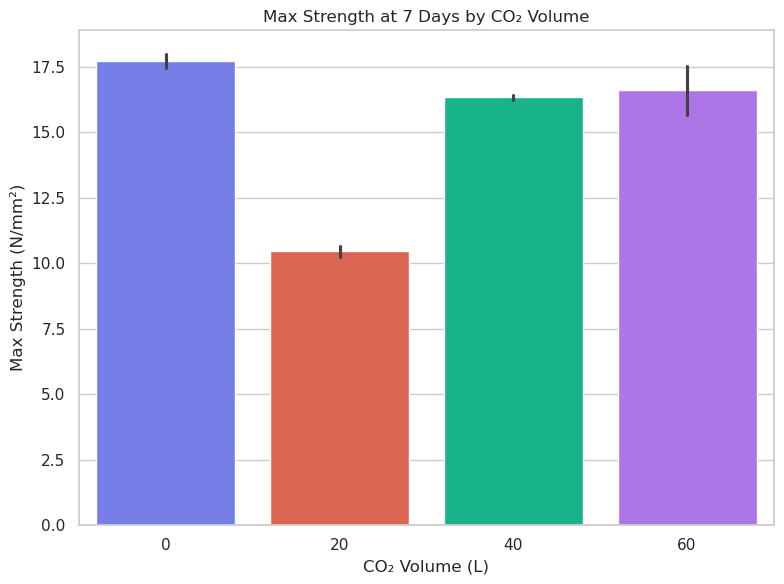

In [38]:
plt.figure(figsize=(8, 6))
week_data = compressive_df[compressive_df["Curing Time (days)"] == 7]

sns.barplot(
    data=week_data,
    x="CO₂ Volume (L)",
    y="Max Strength (N/mm²)",
    palette=co2_palette2
)

plt.title("Max Strength at 7 Days by CO₂ Volume")
plt.ylabel("Max Strength (N/mm²)")
plt.xlabel("CO₂ Volume (L)")
plt.tight_layout()
plt.show()
plt.savefig("max_strength_7days.png", dpi=300)
plt.close()

#### Max Strength at 14 Days by CO₂ Volume

/tmp/ipykernel_10751/2173090827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


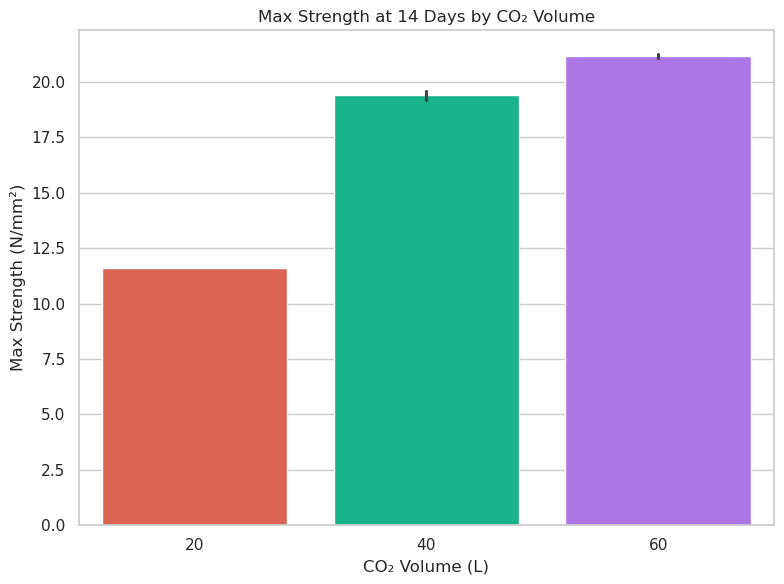

In [40]:
plt.figure(figsize=(8, 6))
two_week_data = compressive_df[compressive_df["Curing Time (days)"] == 14]

sns.barplot(
    data=two_week_data,
    x="CO₂ Volume (L)",
    y="Max Strength (N/mm²)",
    palette=co2_palette2
)

plt.title("Max Strength at 14 Days by CO₂ Volume")
plt.ylabel("Max Strength (N/mm²)")
plt.xlabel("CO₂ Volume (L)")
plt.tight_layout()
plt.show()
plt.savefig("max_strength_14days.png", dpi=300)
plt.close()

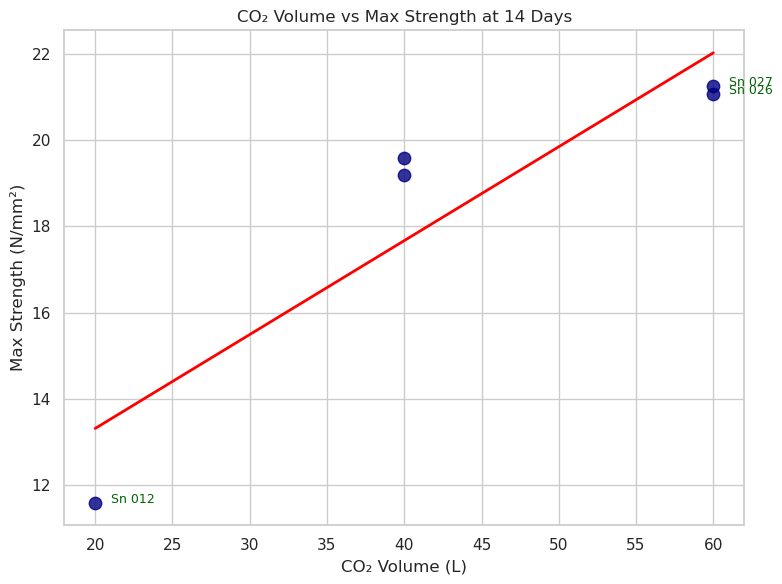

In [41]:
day14 = compressive_df[compressive_df["Curing Time (days)"] == 14]

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Scatter plot with regression line
sns.regplot(
    data=day14,
    x="CO₂ Volume (L)",
    y="Max Strength (N/mm²)",
    ci=None,
    scatter_kws={"s": 80, "color": "navy"},
    line_kws={"color": "red", "linewidth": 2}
)

for _, row in day14.iterrows():
    if row["Max Strength (N/mm²)"] < 17 or row["Max Strength (N/mm²)"] > 21:
        plt.text(
            row["CO₂ Volume (L)"] + 1,
            row["Max Strength (N/mm²)"],
            row["Sample No."],
            fontsize=9,
            color="darkgreen"
        )

plt.title("CO₂ Volume vs Max Strength at 14 Days")
plt.xlabel("CO₂ Volume (L)")
plt.ylabel("Max Strength (N/mm²)")
plt.tight_layout()
plt.show()
plt.savefig("scatter_strength_14days.png", dpi=300)
plt.close()

#### Grouped Bar Chart: Strength at 1, 7, and 14 Days (per CO₂ Level)

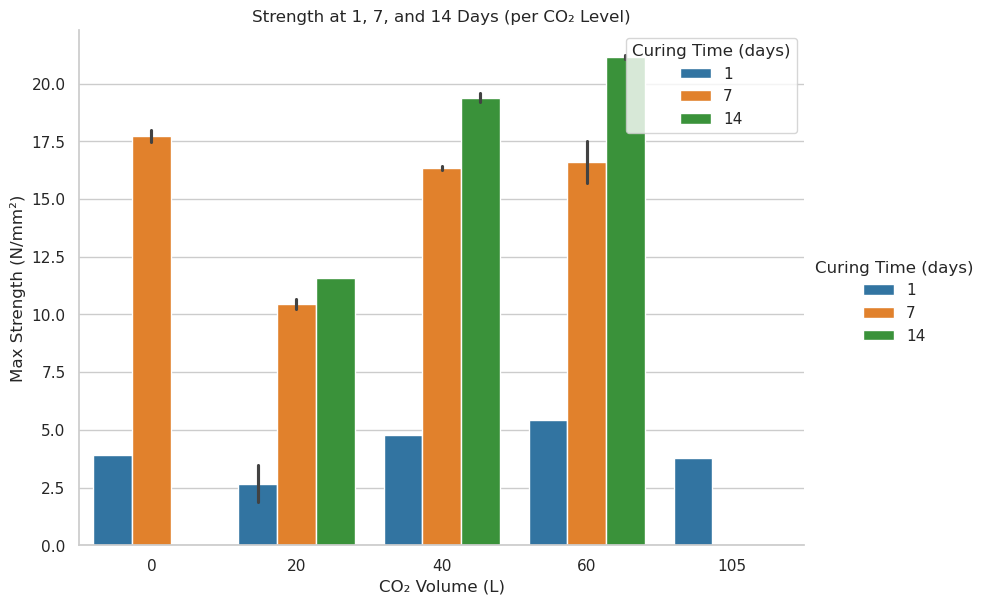

In [43]:
sns.catplot(
    data=compressive_df,
    kind="bar",
    x="CO₂ Volume (L)",
    y="Max Strength (N/mm²)",
    hue="Curing Time (days)",
    palette=curing_palette,
    height=6,
    aspect=1.4
)
plt.title("Strength at 1, 7, and 14 Days (per CO₂ Level)")
plt.xlabel("CO₂ Volume (L)")
plt.ylabel("Max Strength (N/mm²)")
plt.legend(title="Curing Time (days)")

#### Strength vs Time by CO₂ Volume

<Figure size 1000x600 with 0 Axes>

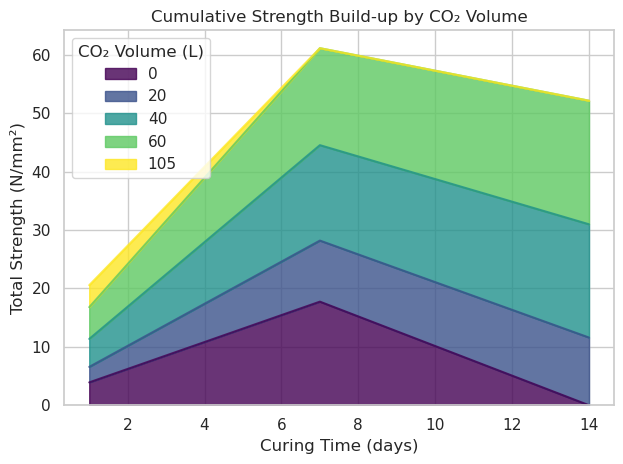

In [45]:
pivot_df = compressive_df.pivot_table(
    index="Curing Time (days)",
    columns="CO₂ Volume (L)",
    values="Max Strength (N/mm²)",
    aggfunc="mean"  
).fillna(0).sort_index()

plt.figure(figsize=(10, 6))
pivot_df.plot(kind="area", stacked=True, alpha=0.8, cmap="viridis")

plt.title("Cumulative Strength Build-up by CO₂ Volume")
plt.ylabel("Total Strength (N/mm²)")
plt.xlabel("Curing Time (days)")
plt.grid(True)
plt.legend(title="CO₂ Volume (L)")
plt.tight_layout()
plt.show()
plt.savefig("stacked_strength_build_up.png", dpi=300)
plt.close()

### Cement Reduction

In [47]:
reduction_df = pd.read_csv("Copy of ZEN Data sheet - Cement_Reduction.csv")

In [48]:
reduction_df['Mixing Date'] = pd.to_datetime(reduction_df['Mixing Date'])
reduction_df['End of Curing'] = pd.to_datetime(reduction_df['End of Curing'])

#### Strength vs % Cement Reduction

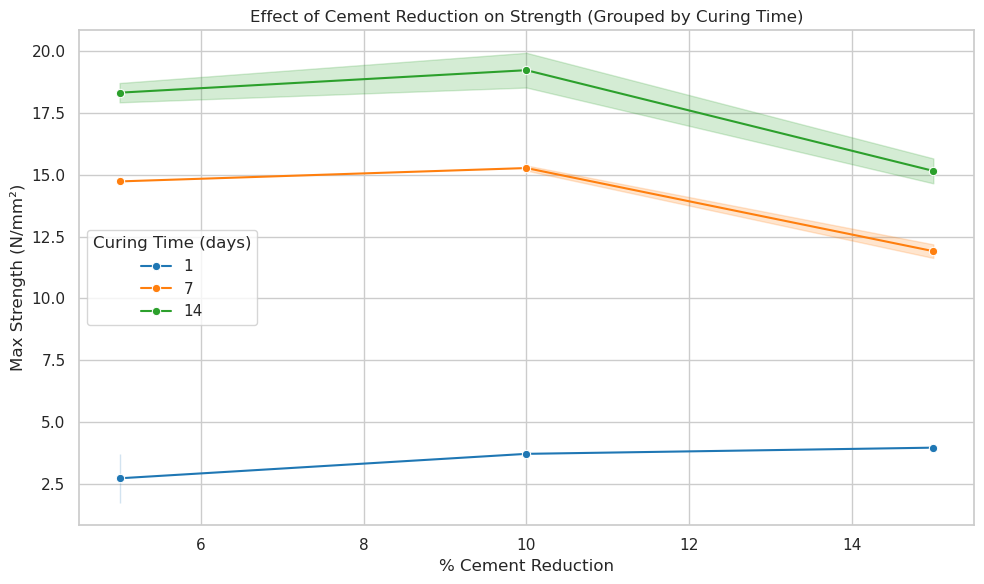

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=reduction_df,
    x="% Cement Reduction",
    y="Max Strength (N/mm²)",
    hue="Curing Time (days)",
    marker="o",
    palette=curing_palette
)

plt.title("Effect of Cement Reduction on Strength (Grouped by Curing Time)")
plt.xlabel("% Cement Reduction")
plt.ylabel("Max Strength (N/mm²)")
plt.tight_layout()
plt.show()
plt.savefig("strength_vs_cement_reduction.png", dpi=300)
plt.close()

#### Max Strength by % Cement Reduction and CO₂ Volume

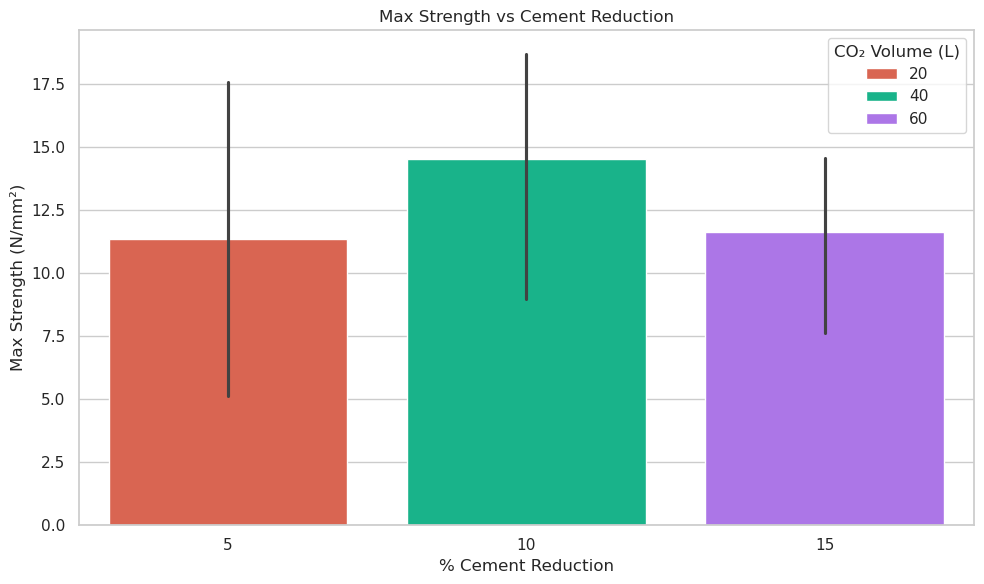

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=reduction_df,
    x="% Cement Reduction",
    y="Max Strength (N/mm²)",
    hue="CO₂ Volume (L)",
    palette=co2_palette
)

plt.title("Max Strength vs Cement Reduction")
plt.tight_layout()
plt.show()
plt.savefig("bar_strength_cement_co2.png", dpi=300)
plt.close()

#### Strength at all Cement Reductions & Curing Durations

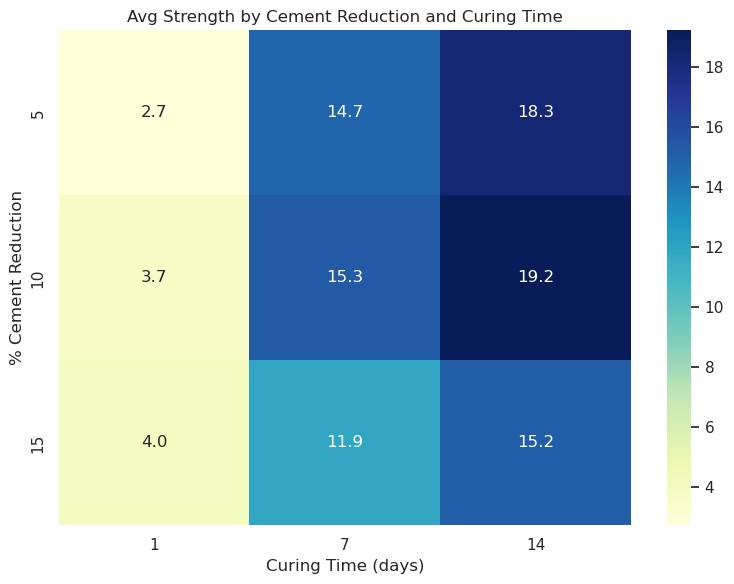

In [54]:
pivot = reduction_df.pivot_table(
    index="% Cement Reduction",
    columns="Curing Time (days)",
    values="Max Strength (N/mm²)",
    aggfunc="mean"
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Avg Strength by Cement Reduction and Curing Time")
plt.tight_layout()
plt.show()
plt.savefig("heatmap_strength_cement.png", dpi=300)
plt.close()


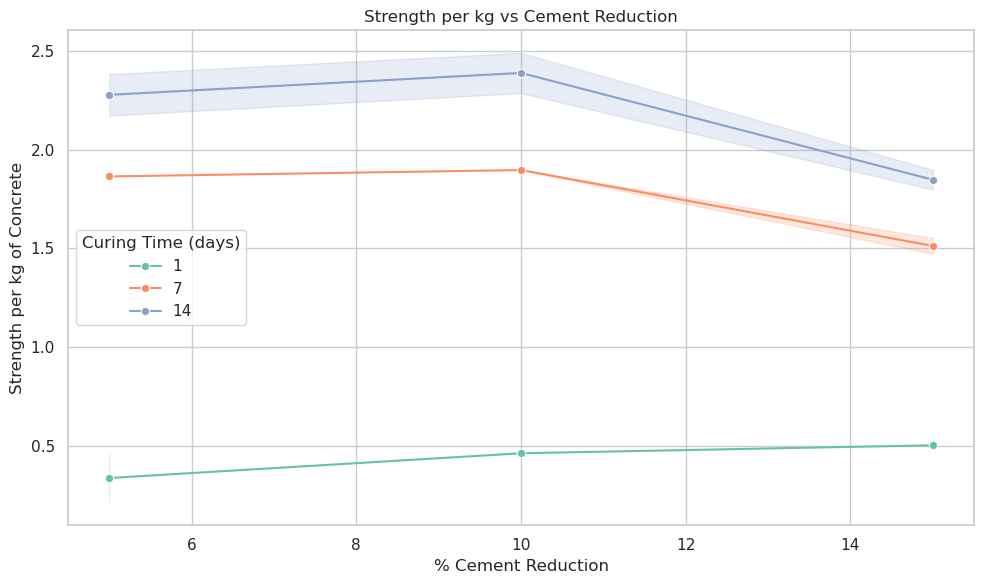

In [55]:
reduction_df["Strength/kg"] = reduction_df["Max Strength (N/mm²)"] / reduction_df["Weight (kg)"]

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=reduction_df,
    x="% Cement Reduction",
    y="Strength/kg",
    hue="Curing Time (days)",
    marker="o",
    palette="Set2"
)

plt.title("Strength per kg vs Cement Reduction")
plt.ylabel("Strength per kg of Concrete")
plt.tight_layout()
plt.show()
plt.savefig("strength_per_kg.png", dpi=300)
plt.close()


### Sensor data

In [57]:
sensor_df = pd.read_csv('Copy of ZEN Data sheet - Sensor_Data.csv')

In [58]:
sensor_df.head()

,Sample No.,binned_time,Date,Time,pressure,temperature
0,Sn 001,6/10/2025 11:46:00,2025-06-10,11:46:00,27.33,32.21
1,Sn 001,6/10/2025 11:47:00,2025-06-10,11:47:00,26.78,32.21
2,Sn 001,6/10/2025 11:54:00,2025-06-10,11:54:00,26.42,31.00
3,Sn 001,6/10/2025 11:55:00,2025-06-10,11:55:00,27.04,31.13
4,Sn 001,6/10/2025 11:56:00,2025-06-10,11:56:00,27.20,31.04


In [59]:
sensor_df.dtypes

Sample No.      object
binned_time     object
Date            object
Time            object
pressure       float64
temperature    float64
dtype: object

In [60]:
sensor_df["Time"] = pd.to_datetime(sensor_df["Time"])
sensor_df["Date"] = pd.to_datetime(sensor_df["Date"])

/tmp/ipykernel_10751/1018270695.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sensor_df["Time"] = pd.to_datetime(sensor_df["Time"])


In [61]:
sensor_df.dtypes

Sample No.             object
binned_time            object
Date           datetime64[ns]
Time           datetime64[ns]
pressure              float64
temperature           float64
dtype: object

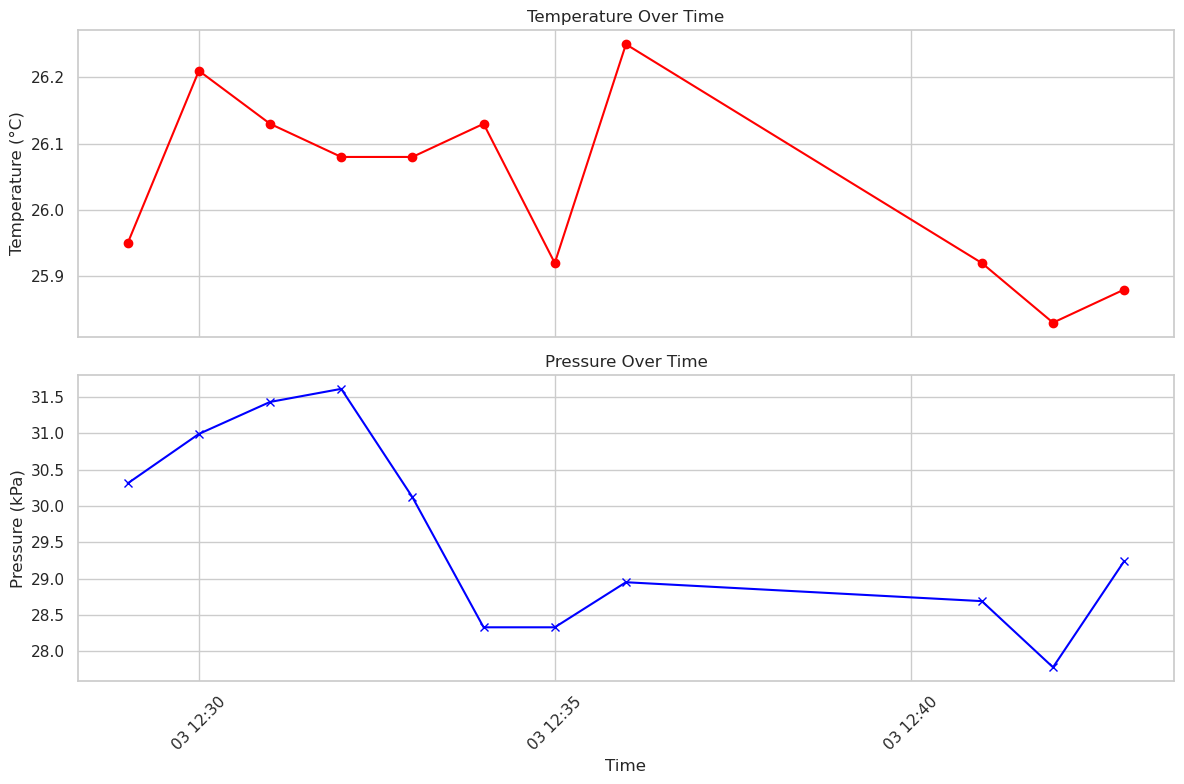

In [62]:
sample1_df = sensor_df[sensor_df["Sample No."] == "Sn 009"].copy()
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Temperature plot
axs[0].plot(sample1_df["Time"], sample1_df["temperature"], color="red", marker="o")
axs[0].set_ylabel("Temperature (°C)")
axs[0].set_title("Temperature Over Time")

# Pressure plot
axs[1].plot(sample1_df["Time"], sample1_df["pressure"], color="blue", marker="x")
axs[1].set_ylabel("Pressure (kPa)")
axs[1].set_xlabel("Time")
axs[1].set_title("Pressure Over Time")

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sensor_subplots_sn001.png", dpi=300)
plt.show()



#### Batches

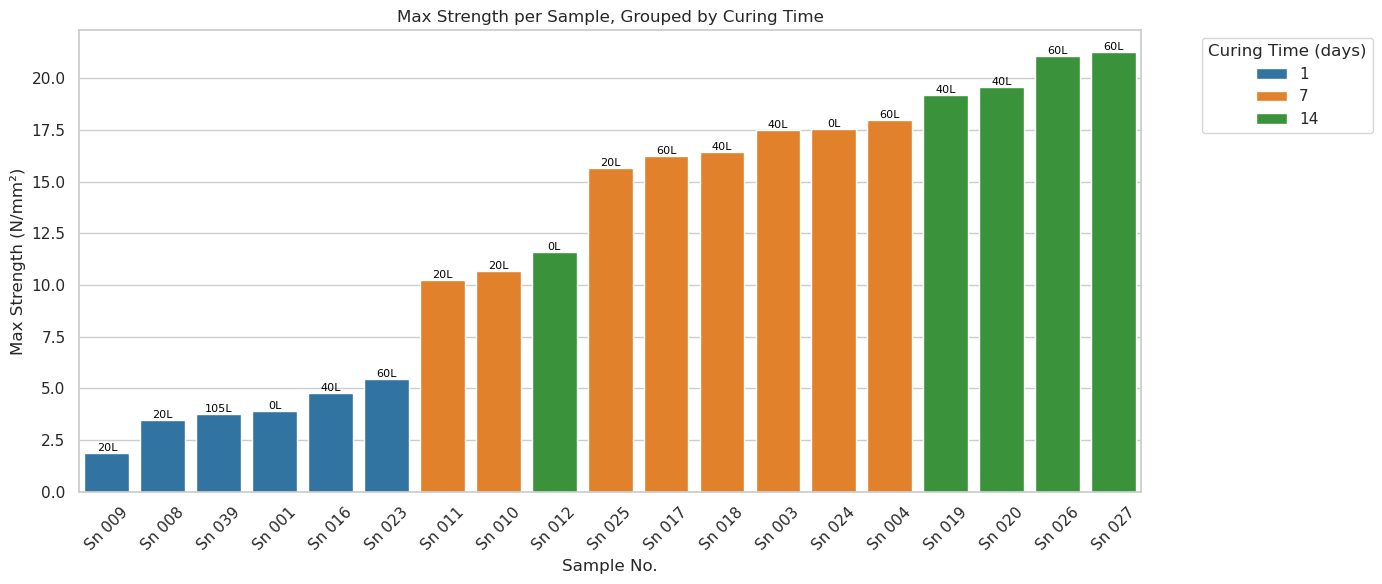

In [64]:
# Sort by Max Strength
grouped_df = compressive_df.sort_values(by="Max Strength (N/mm²)", ascending=True)

grouped_df["Sample No."] = pd.Categorical(
    grouped_df["Sample No."], categories=grouped_df["Sample No."], ordered=True
)

plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=grouped_df,
    x="Sample No.",
    y="Max Strength (N/mm²)",
    hue="Curing Time (days)",
    palette=curing_palette
)

# Annotate CO₂ Volume
for bar, (_, row) in zip(barplot.patches, grouped_df.iterrows()):
    height = bar.get_height()
    barplot.annotate(
        f"{int(row['CO₂ Volume (L)'])}L",
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

plt.title("Max Strength per Sample, Grouped by Curing Time")
plt.xlabel("Sample No.")
plt.ylabel("Max Strength (N/mm²)")
plt.legend(title="Curing Time (days)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("strength_sorted_by_value.png", dpi=300)
plt.show()

/tmp/ipykernel_10751/1337312303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


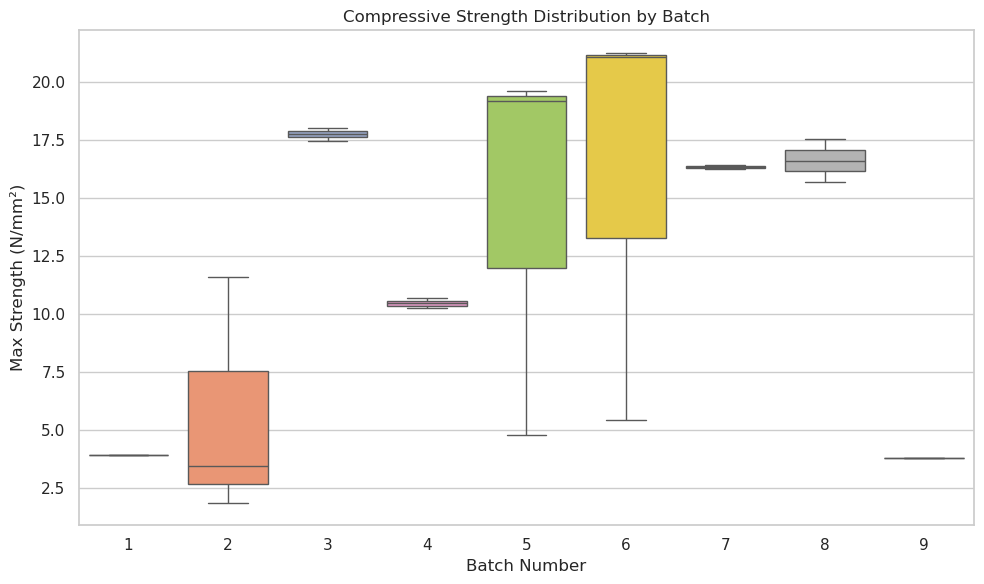

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=compressive_df,
    x="Batch No.",
    y="Max Strength (N/mm²)",
    palette="Set2"
)

plt.title("Compressive Strength Distribution by Batch")
plt.xlabel("Batch Number")
plt.ylabel("Max Strength (N/mm²)")
plt.tight_layout()
plt.savefig("boxplot_strength_per_batch.png", dpi=300)
plt.show()


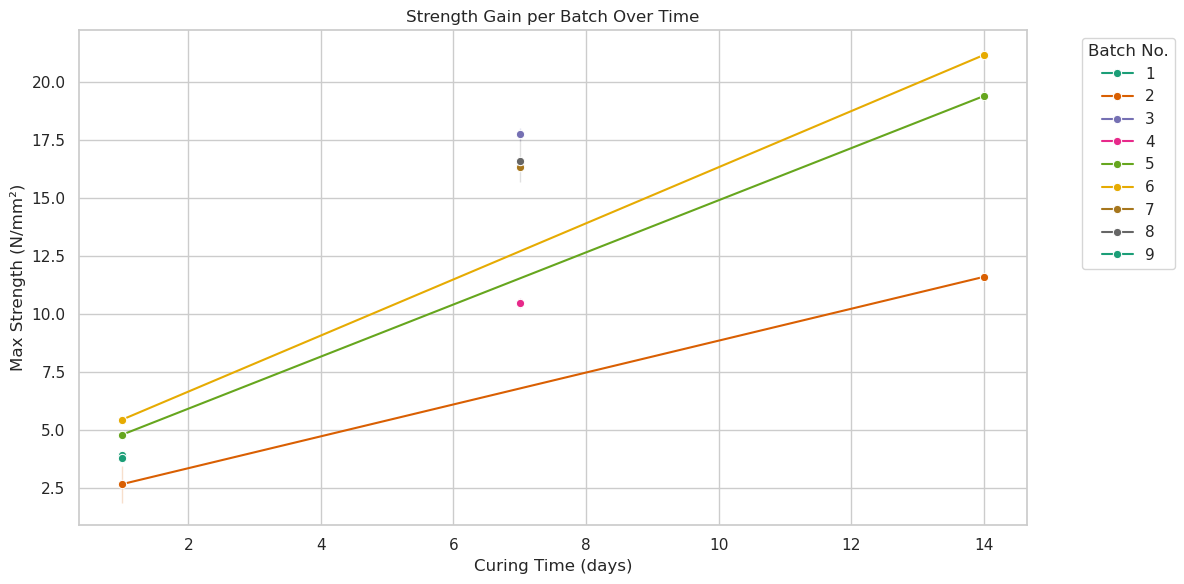

In [66]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=compressive_df,
    x="Curing Time (days)",
    y="Max Strength (N/mm²)",
    hue="Batch No.",
    marker="o",
    palette="Dark2"
)

plt.title("Strength Gain per Batch Over Time")
plt.xlabel("Curing Time (days)")
plt.ylabel("Max Strength (N/mm²)")
plt.legend(title="Batch No.", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("strength_over_time_per_batch.png", dpi=300)
plt.show()